In [1]:
import networkx as nx
import numpy as np
import random
random.seed;
import matplotlib.pyplot as plt
import scipy
from scipy import sparse
from scipy.sparse import linalg
import time
import math
from scipy import stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from random import shuffle

import sys
sys.path += ['/Package'] ### Specify the directory where the Package is
from clustering_more import *

import warnings
warnings.filterwarnings("ignore")

## Load the datasets

#### Labelled datasets

In [2]:
karate = nx.read_gml('datasets/karate.gml', label = 'id')
A_karate = np.array(nx.adjacency_matrix(karate).todense())
classes_karate = nx.get_node_attributes(karate,'value')
ck = np.zeros(len(classes_karate))
for i in range(len(ck)):
    ck[i] += classes_karate[i+1]
classes_karate = ck.astype(int)


dolphins = nx.read_gml('datasets/dolphins.gml', label = 'id')
A_dolphins = np.array(nx.adjacency_matrix(dolphins).todense())
classes_dolphins = nx.get_node_attributes(dolphins,'value')
cp = np.zeros(len(A_dolphins))
for i in range(len(cp)):
    cp[i] = classes_dolphins[i]
classes_dolphins = cp.astype(int)

polbooks = nx.read_gml('datasets/polbooks.gml', label = 'id')
A_polbooks = np.array(nx.adjacency_matrix(polbooks).todense())
classes_polbooks = nx.get_node_attributes(polbooks,'value')
cp = np.zeros(len(classes_polbooks))
for i in range(len(cp)):
    cp[i] = classes_polbooks[i]-1
classes_polbooks = cp.astype(int)

football = nx.read_gml('datasets/football.gml', label = 'id')
A_football = np.array(nx.adjacency_matrix(football).todense())
classes_football = nx.get_node_attributes(football,'value')
cp = np.zeros(len(A_football))
for i in range(len(cp)):
    cp[i] = classes_football[i+1]-1
classes_football = cp.astype(int)

polblogs = nx.read_gml('datasets/polblogs.gml', label = 'id')
A_polblogs = np.array(nx.adjacency_matrix(polblogs).todense())
A_polblogs = np.delete(A_polblogs,0,axis = 0)
A_polblogs = np.delete(A_polblogs,0,axis = 1)
classes_polblogs = nx.get_node_attributes(polblogs,'value')
cp = np.zeros(len(A_polblogs))
for i in range(len(cp)):
    cp[i] = classes_polblogs[i]
classes_polblogs = cp.astype(int)

### Choose the network

In [3]:
# A = A_karate.astype(float)
# A = A_dolphins.astype(float)
# A = A_polbooks.astype(float)
# A = A_football.astype(float)
A = A_polblogs.astype(float)



# real_classes = classes_karate
# real_classes = classes_dolphins
# real_classes = classes_polbooks
# real_classes = classes_football
real_classes = classes_polblogs

A = sparse.coo_matrix(A)

n = 1221


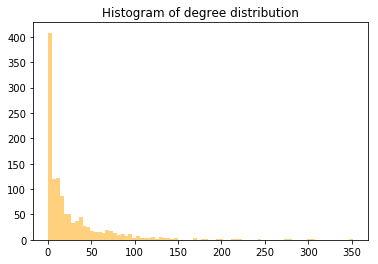

In [4]:
n = len(A.A)
print('n = ' + str(n))
plt.figure()
d = np.sum(A.A, axis = 0)
plt.hist(d,bins = 10*int(n**0.3), color = 'orange', alpha = 0.5)
plt.title('Histogram of degree distribution')
plt.show()

### Test different methods

#### Our method

In [5]:
n_cycles = 12
max_n_classes = 70
percentage = 'yes'

n_classes = len(np.unique(real_classes))

classes, X, n_clusters, r_estimate  = BH(A, n_cycles,max_n_classes, n_classes, percentage)
mod = modularity(A.A, classes)
classes, ov = overlap(real_classes, classes)
print('\nOverlap: ' + str(ov))

Completion : 100.0%
Overlap: 0.9066339066339066


#### Saade

In [6]:
classes_s, X_s = saade(A, n_clusters)
classes_s, ov = overlap(real_classes, classes_s)
print('Overlap: ' + str(ov))

Overlap: 0.3218673218673218


#### Adjacency

In [7]:
classes_a,X_a = adjacency(A,n_clusters)
classes_a, ov = overlap(real_classes, classes_a)
print('Overlap: ' + str(ov))

Overlap: 0.2563472563472564
